<a href="https://colab.research.google.com/github/SanjanaS183/Statistical-intepretation-of-beta-distribution/blob/main/Statistical_intepretation_of_beta_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def beta_measure(x,y):
 prob_m = beta.cdf(y, a=3, b=7)- beta.cdf(x,a=3,b=7)
 return prob_m

Probabilty mass between various intervals:
0-1: 1.0
0-0: 0.0
0.25-0.75: 0.599334716796875
0-0.5: 0.91015625
0.5-1: 0.08984375


Text(0.5, 1.0, 'Density of Beta')

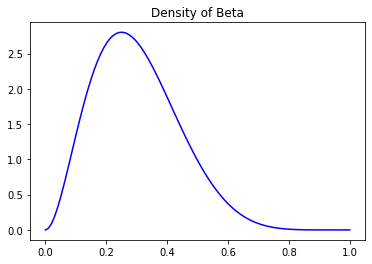

In [ ]:
print("Probabilty mass between various intervals:")
z1 = beta_measure(0,1)
print("0-1:",z1)
z2 = beta_measure(0,0)
print("0-0:",z2)
z3 = beta_measure(0.25,0.75)
print("0.25-0.75:",z3)
z4 = beta_measure(0,0.5)
print("0-0.5:",z4)
z5 = beta_measure(0.5,1)
print("0.5-1:",z5)
x = np.linspace(0,1,100)
y = beta.pdf(x,3,7)

fig, (ax1) = plt.subplots(1)
ax1.plot(x,y,'b')
ax1.set_title("Density of Beta")


In [ ]:
def beta_pdf(x,a,b):
 y = beta.pdf(x,a,b)
 return y

In [ ]:
from scipy import integrate
x2 = lambda x: beta_pdf(x,3,7)
print("Integration under various limits:")
i = integrate.quad(x2,0,1)
print(i)
i = integrate.quad(x2,0,0)
print(i)
i = integrate.quad(x2,1/4,3/4)
print(i)
i = integrate.quad(x2,0,1/2)
print(i)
i = integrate.quad(x2,1/2,1)
print(i)

Integration under various limits:
(1.0, 1.1102230246251565e-14)
(0.0, 0.0)
(0.5993347167968751, 6.653952020450883e-15)
(0.9101562499999999, 1.01047642475649e-14)
(0.08984374999999997, 9.974659986866637e-16)


In [ ]:
def pdf_intg(x,a,b):
 c = lambda x: np.convolve(beta_pdf (x,3,7) , beta_pdf (x,7,3))
 i = integrate.quad( c,-np.inf, np.inf)
 return i

In [ ]:
z1 =pdf_intg(x,3,7)
z2= pdf_intg(x,7,3)
z3 = z1 + z2
print(z3)

(0.2902509255450433, 1.7926115427119955e-09, 0.2902509255450433, 1.7926115427119955e-09)


In [ ]:
def pdf_intg_2(t,x):
  return beta.pdf(x,a,b)* beta.pdf(t-x,b,a)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


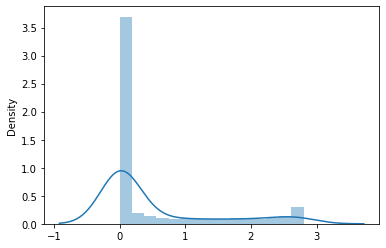

In [ ]:
import seaborn as sns
a =3
b = 7
x = np.linspace(0,1,100)
pdf_arr=[]
for i in x:
  pdf_arr.append(integrate.quad(pdf_intg_2, -np.inf, np.inf, args = (i, )))

sns.distplot(pdf_arr)
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


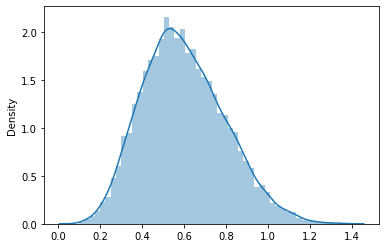

In [ ]:
u= np.random.beta(3, 7, size=10000)
v= np.random.beta(3, 7, size=10000)
w = u+v
sns.distplot(w)